# Discretizando la ecuación de conducción de calor

Se tiene la ecuación de calor en el estado no estacionario:

$$\frac{1}{\alpha}\frac{\partial T}{\partial t}=\frac{\partial^2 T}{\partial r^2}+\frac{2}{r}\frac{\partial T}{\partial r}$$


Para proceder con la discretización se debe elegir qué derivada numérica se va a utilizar, para esto se recurre a la página 668 del libro de métodos numéricos Chapra, donde se describe una serie de aproximaciones a las derivadas, por ejemplo, si se toma una diferencia centrada con un error $O(h^2)$:

$$\frac{\partial T}{\partial t}\approx\frac{T_{i}^{l+1}-T_{i}^{l-1}}{2\Delta t}$$

Mientras que si se toma una diferencia centrada para con un error $O(h^2)$ para la dimensión espacial:

$$\frac{\partial T}{\partial r}\approx\frac{T_{i+1}^{l}-T_{i-1}^{l}}{2\Delta r}$$
$$\frac{\partial^2 T}{\partial r^2}\approx\frac{T_{i+1}^{l}-2T_{i}^{l}+T_{i-1}^{l}}{\left(\Delta r\right)^2}$$

Sustituyendo y aproximando $r\approx i\Delta r$:

$$\frac{1}{\alpha}\frac{T_{i}^{l+1}-T_{i}^{l-1}}{2\Delta t}=\frac{T_{i+1}^{l}-2T_{i}^{l}+T_{i-1}^{l}}{\left(\Delta r\right)^2}+\frac{2}{i\Delta r}\frac{T_{i+1}^{l}-T_{i-1}^{l}}{2\Delta r}$$

Entonces, despejando para $T_{i}^{l+1}$:

$$T_{i}^{l+1}=T_{i}^{l-1}+\frac{2\alpha}{\left(\Delta r\right)^2}\left[T_{i+1}^l-2T_{i}^l+T_{i-1}^l+\frac{2}{i}\left(T_{i+1}^l-T_{i-1}^l\right)\right]$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from copy import deepcopy

In [32]:
A = 2.0
Lx = 10.0
dx = 0.1
x0 = 5.0
l = 1.5
D = 0.5
x = np.arange(0,Lx+dx,dx)
dt = 0.1
tf = 10.0
t = np.arange(0,tf+dt,dt)
X,T = np.meshgrid(x,t)
ntérminos = 20
niter = ntérminos

In [65]:
def Rho0(X):
    '''
    Función que retorna el valor inicial de rho para una posición x
    
    Parámetros iniciales:
    ---------------------
    x: punto en el eje x
    
    Parámetros de salida:
    ---------------------
    rho0: valor de rho(x,0)
    '''
    a = (X)**2/l**2
    rho0 = A*np.exp(a)
    return rho0

In [66]:
# matriz inicial
rhoi = np.zeros(((int(Lx/dx)+1),(int(tf/dt))+1),float)

# condiciones iniciales
for n in range(len(x)):
    rhoi[0,n] = Rho0(x[n])

# condiciones de frontera    
for m in range(len(x)):
    rhoi[m,0]=0
    rhoi[m,-1]=0

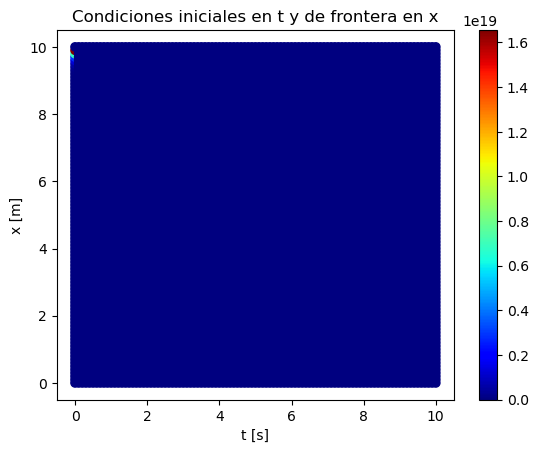

In [67]:
plt.scatter(T,X,c=rhoi,cmap="jet")
plt.title('Condiciones iniciales en t y de frontera en x')
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.colorbar()
plt.show()

In [68]:
def DiferenciasFinitasCalor(rhoi,niter):
    '''
    Función que calcula el flujo de calor con el método de diferencias finitas
    
    Parámetros iniciales:
    ---------------------
    rhoi: matriz sobre la que se itera, contiene las condiciones iniciales
    niter: número de iteraciones
    
    Salida:
    ---------------------
    rho: matriz con los valores de rho.
    '''
    rho = deepcopy(rhoi)
    alpha = 2*D*dt/dx**2
    for iter in range(niter):
        for m in range(0,len(t)-1):
            for n in range(0,len(x)-1):
                rho[m+1,n] = rho[m-1,n] + alpha*(rho[m,n-1] - 2*rho[m,n] + rho[m,n+1]+2*(T[m,n+1]-T[m,n-1])/n)
        
    return rho,alpha

In [69]:
RhoDF,alpha = DiferenciasFinitasCalor(rhoi,niter)

<ipython-input-68-69cb1859f32a>:19: RuntimeWarning: invalid value encountered in double_scalars
  rho[m+1,n] = rho[m-1,n] + alpha*(rho[m,n-1] - 2*rho[m,n] + rho[m,n+1]+2*(T[m,n+1]-T[m,n-1])/n)


In [70]:
alpha

9.999999999999998

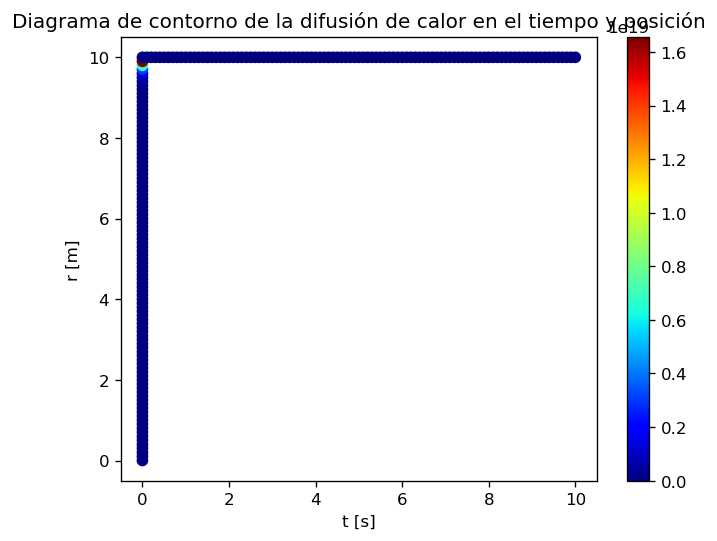

In [71]:
plt.figure(dpi=120)
plt.scatter(T,X,c=RhoDF,cmap='jet')
plt.ylabel('r [m]')
plt.xlabel('t [s]')
plt.title('Diagrama de contorno de la difusión de calor en el tiempo y posición')
plt.colorbar()
plt.show()